In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import maxflow


def display_image(window_name, img, window_1_name=None, img_1=None):
    """
    Displays image with given window name.
    :param window_name: name of the window
    :param img: image object to display
    """
    if window_1_name is not None and img_1 is not None:
        plt.figure(figsize=(15, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap="gray")
        plt.title(window_name)
        plt.subplot(1, 2, 2)
        plt.imshow(img_1, cmap="gray")
        plt.title(window_1_name)
    else:
        plt.imshow(img, cmap="gray")
        plt.title(window_name)
        plt.show()

## Assignment 6
### Task 2. Kalman Filtering

You need to implement the basic Kalman Filtering algorithm.  You observe a set of 2D noisy observations $(x_i,y_i)$ which are the coordinates of the 2D space as shown in Figure 1.

<img style="padding-left:280px" src='data/task2.png' width="600" >

In [3]:
import task02 as t2

In [5]:
class KalmanFilter(object):
    def __init__(self, psi, sigma_p, phi, sigma_m, tau):
        self.psi = psi
        self.sigma_p = sigma_p
        self.phi = phi
        self.sigma_m = sigma_m
        self.state = None
        self.convariance = None
        self.tau = tau

    def init(self, init_state):
        self.state = init_state
        self.covariance = 0.01 * np.identity(init_state.shape[0])

    def track(self, xt):
        
        # State Prediction.  self.state is the previous state (mu_t_minus_1)
        mu_plus = np.matmul(self.psi, self.state)

        # Covariance Prediction.  self.covariance is the previous covariance (Sigma_t_minus_1)
        sigma_plus = self.sigma_p + np.matmul(np.matmul(self.psi, self.covariance), self.psi.T) 

        # Kalman Gain.  
        K = np.matmul(np.matmul(sigma_plus, self.phi.T), np.linalg.inv(self.sigma_m + np.matmul(np.matmul(self.phi, sigma_plus), self.phi.T)))

        # State Update.  xt is the current observation 
        self.state = mu_plus + np.matmul(K, (xt - np.matmul(self.phi, mu_plus)))   # TODO mu_m ????

        # Covariance Update.
        self.covariance = np.matmul((np.identity(self.state.shape[0]) - np.matmul(K, self.phi)), sigma_plus)  

        




    def get_current_location(self):
        curr_location = np.matmul(self.phi, self.state)
        return curr_location

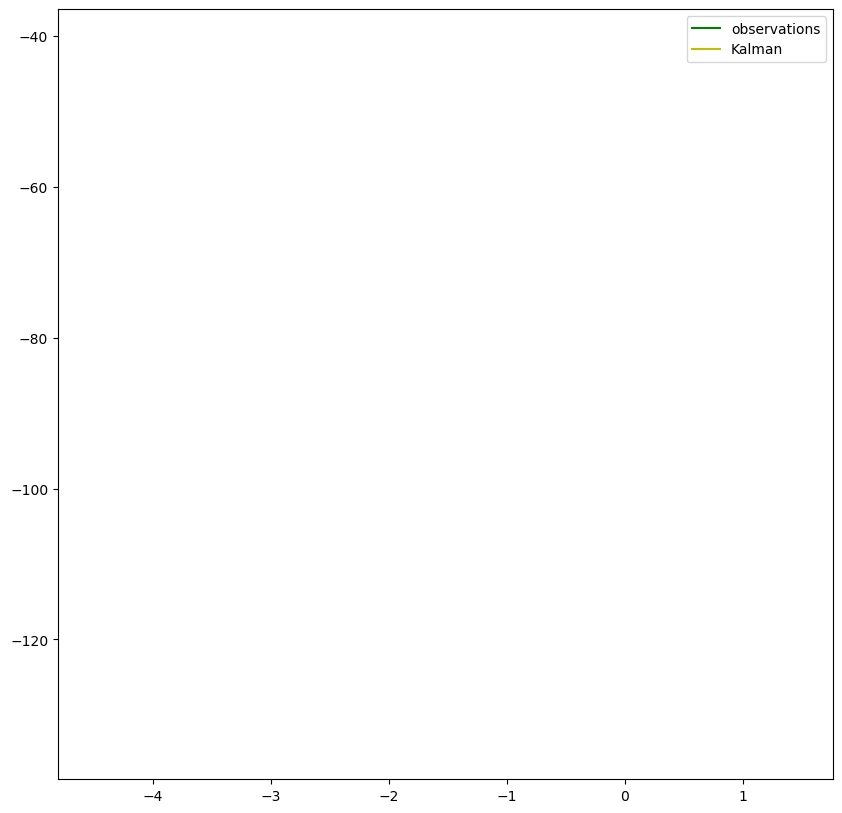

In [8]:
psi, sigma_p, phi, sigma_m = t2.get_world_model()

init_state = np.array([-10, -15, 1, -2])

kalman_filter = KalmanFilter(psi, sigma_p, phi, sigma_m, 0.1)
kalman_filter.init(init_state)

track = t2.perform_tracking(kalman_filter)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

num_steps = len(t2.observations) 
for n in range(num_steps):
    ax.clear()
    o_x, o_y = t2.get_data_at_iteration(n, t2.observations) 
    # TODO: 
    t_x, t_y = t2.get_data_at_iteration(n, track) 
    # t_x, t_y = 0, 0
         
    ax.plot(o_x, o_y, 'g', label='observations')
    ax.plot(t_x, t_y, 'y', label='Kalman')
    ax.legend()
    plt.pause(0.01)
plt.pause(3)